# Traffic model research

In [1]:
from src.traffic_model import traffic_model as model
from joblib import Parallel, delayed
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
import matplotlib.animation as animation

## Test human drive vehicle

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

### Single line

__Test__

In [4]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 200}

In [5]:
model_1 = model.Model(road_parametrs=road_param, vehicles=cars)

In [6]:
%%time
model_1.model_stabilization(2000)

Wall time: 40 s


In [7]:
model_1.model_research(100)

In [8]:
model_1.result

{'rho': [0.2], 'flow': [0.27848], 'change_frequency': 0.0}

__Fundamential diagramm__

In [ ]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(1000, step=50)[1:]
cars_arr

In [ ]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 1,
    }
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [ ]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

In [ ]:
result = pd.DataFrame(tabel_result)
result

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

label = "$p_{slow} = $"+str(0.5)
plt.plot(result['rho'], result['flow'], label=label)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different probability to slow', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

__Visualization__

In [33]:
road_param = {
    "N_cells": 100,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 30}

In [34]:
model_vis = model.Model(road_parametrs=road_param, vehicles=cars)

In [35]:
%%time
model_vis.model_stabilization(2000)

CPU times: total: 7.44 s
Wall time: 7.48 s


In [39]:
model_vis.model_research(100, is_diagramm=True)

In [40]:
layers = model_vis.x_t_diagramm[0]

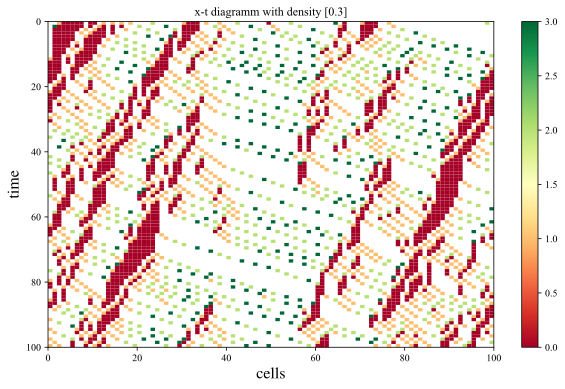

In [41]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


fig = plt.figure(figsize=(10,6), dpi=300)

time = np.linspace(0, layers.shape[0]-1, layers.shape[0], dtype=int)
cells = np.linspace(0, layers.shape[1]-1, layers.shape[1], dtype=int)
grid = np.meshgrid(cells, time, indexing='xy')

#plt.scatter(grid[0], grid[1], marker='s', c='grey', s=1, alpha=0.2)
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = road_map, cmap = 'RdYlGn', s = 4, alpha = 1, edgecolors='black', linewidths=0.5 )
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = layers, cmap = 'RdYlGn', s = 0.1, alpha = 1 )
bar_pic = plt.pcolor(layers.astype(float), cmap="RdYlGn", vmin=0, vmax=3)
plt.xlim(0, layers.shape[1])
plt.ylim(0, layers.shape[0])
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(0, 3)
plt.title(f"x-t diagramm with density {model_vis.result['rho']}")
plt.xlabel(r'$\mathrm{cells}$',  fontsize = fs)
plt.ylabel(r'$\mathrm{time}$',  fontsize = fs)
#plt.grid(linewidth=0.5)
plt.show()
#fig.savefig(f'data/x_t_{density}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

In [32]:
#fig.savefig(f'data/x_t_{model_vis.result["rho"]}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

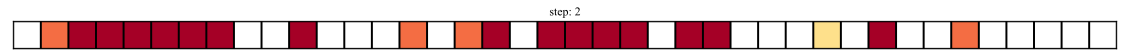

In [12]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
fig, ax = plt.subplots(figsize=(20,1))

cells = layers[0].astype(float).reshape((1,layers.shape[1]))
left, right = 0, 40

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_xticks(np.arange(right-left+1))
ax.set_yticks([0,1])
ax.grid(color='black', linewidth=2)
ax.set_title(f"step: {2}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
left, right = 0, 50

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

def animate(i):
    ax.clear()
    cells = layers[i].astype(float).reshape((1,layers.shape[1]))
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(np.arange(right-left+1))
    ax.set_yticks([0,1])
    ax.grid(color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, layers.shape[0]),
                                      interval = 500,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_slow.gif',
                 writer='ffmpeg',  
                  dpi=300)

### Three line

__Test__

In [9]:
road_param = {
    "N_cells": 1000,
    "N_lane": 3,
}
cars = {model.HumanDriveVehicle: 600}

In [10]:
model_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [11]:
%%time
model_3.model_stabilization(2000)

CPU times: total: 2min 50s
Wall time: 2min 50s


In [12]:
model_3.model_research(100)

In [13]:
model_3.result

{'rho': [0.194, 0.204, 0.202],
 'flow': [0.31314, 0.32329, 0.32705],
 'change_frequency': 6.58}

In [14]:
model_3.density, model_3.flow

(0.20000000000000004, 0.32116000000000006)

__Fundamential diagramm__

In [16]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(3000, step=150)[1:]
cars_arr

array([ 150,  300,  450,  600,  750,  900, 1050, 1200, 1350, 1500, 1650,
       1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850])

In [17]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 3,
    }
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [18]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  19 | elapsed:   38.9s remaining:  5.5min
[Parallel(n_jobs=10)]: Done   4 out of  19 | elapsed:  1.6min remaining:  5.9min
[Parallel(n_jobs=10)]: Done   6 out of  19 | elapsed:  2.9min remaining:  6.3min
[Parallel(n_jobs=10)]: Done   8 out of  19 | elapsed:  4.3min remaining:  6.0min
[Parallel(n_jobs=10)]: Done  10 out of  19 | elapsed:  5.6min remaining:  5.1min
[Parallel(n_jobs=10)]: Done  12 out of  19 | elapsed:  6.8min remaining:  4.0min
[Parallel(n_jobs=10)]: Done  14 out of  19 | elapsed:  7.6min remaining:  2.7min
[Parallel(n_jobs=10)]: Done  16 out of  19 | elapsed:  8.3min remaining:  1.6min


Wall time: 8min 58s


[Parallel(n_jobs=10)]: Done  19 out of  19 | elapsed:  9.0min finished


In [9]:
result = pd.DataFrame(tabel_result)

In [20]:
#result.to_csv('data/3_line_diagramm.csv')

In [57]:
tabel_3 = pd.read_csv('data/3_line_diagramm.csv')
tabel_3.head(5)

,Unnamed: 0,rho,flow,change_frequency
0,0,"[0.048, 0.05, 0.052]","[0.11959, 0.12364000000000001, 0.12952]",0.013333
1,1,"[0.091, 0.101, 0.108]","[0.22064, 0.25939, 0.25669000000000003]",0.126667
2,2,"[0.146, 0.153, 0.151]","[0.31948, 0.33409, 0.33401000000000003]",2.266667
3,3,"[0.19, 0.201, 0.209]","[0.31564, 0.32987, 0.32869]",6.616667
4,4,"[0.246, 0.254, 0.25]","[0.30844, 0.31961, 0.31513]",10.070000


In [84]:
rho = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel_3['rho'].values])
flow = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel_3['flow'].values])

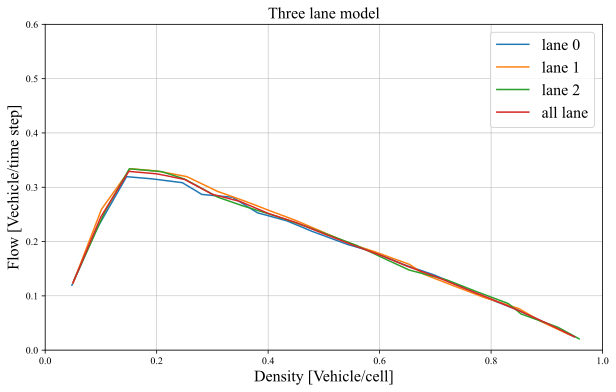

In [88]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for i in range(rho.shape[1]):
    label = f'lane {i}'
    plt.plot(rho[:,i], flow[:,i], label=label)
    
label = "all lane"
plt.plot(rho.mean(axis=1), flow.mean(axis=1), label=label)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'Three lane model', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

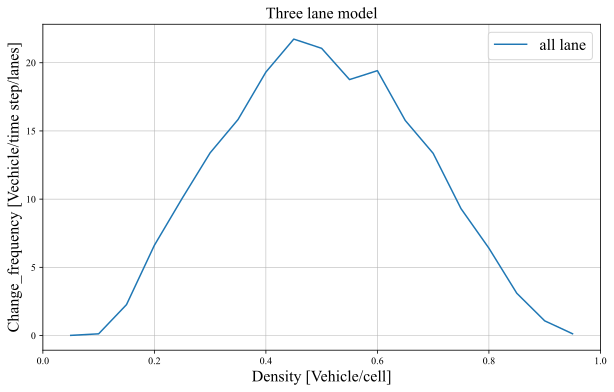

In [95]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)
   
plt.plot(rho.mean(axis=1), tabel_3['change_frequency'], label=label)

#plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Change_frequency [Vechicle/time step/lanes]',  fontsize = fs)
plt.title(r'Three lane model', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

__Visualization__

In [8]:
road_param = {
    "N_cells": 100,
    "N_lane": 3,
}
cars = {model.HumanDriveVehicle: 50}

In [9]:
model_vis_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [10]:
%%time
model_vis_3.model_stabilization(1000)

CPU times: total: 6.45 s
Wall time: 6.46 s


In [ ]:
model_vis_3.model_research(200, is_diagramm=True)

In [ ]:
layers = list()

In [ ]:
for layer in model_vis_3.x_t_diagramm.values():
    layers.append(layer)
layers = np.array(layers)

In [ ]:
layers.shape

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

fig, ax = plt.subplots(figsize=(40,2))

step = 0
cells = layers[:,step,:].astype(float)
left, right = 0, 40

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)
ax.set_xticks(np.arange(right-left+1))
ax.set_yticks([0,1,2])
ax.grid(color='black', linewidth=1)
ax.set_title(f"step: {step}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
left, right = 0, 50

fig, ax = plt.subplots(figsize=(40,4))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[:,i,:].astype(float)
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(np.arange(right-left+1))
    ax.set_yticks([0,1,2])
    ax.grid(color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 400,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_3_lane.gif',
                 writer='ffmpeg',  
                  dpi=300)

## Test bus

__Test__

In [73]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
buses = {model.Bus: 400}
station = tuple([10, 50, 100, 200, 350, 400, 500, 600, 900])

In [74]:
model.Bus.set_station(station)
model_bus = model.Model(road_parametrs=road_param, vehicles=buses)


In [75]:
%%time
model_bus.model_stabilization(1000)

Wall time: 18.4 s


In [76]:
model_bus.model_research(400)

In [77]:
model_bus.result

{'rho': [0.4], 'flow': [0.036145000000000004], 'change_frequency': 0.0}

__Vizualization__

In [56]:
road_param = {
    "N_cells": 1000,
    "N_lane": 3,
}
buses = {model.Bus: 10, model.HumanDriveVehicle: 400}
station = tuple([100, 200, 500, 800, 900])

In [57]:
model.Bus._lenght =  2
model.Bus.set_station(station)
model_bus =  model.Model(road_parametrs=road_param, vehicles=buses)

In [58]:
%%time
model_bus.model_stabilization(1000)

Wall time: 24.5 s


In [59]:
model_bus.model_research(200, is_diagramm=True)

In [60]:
layers = list()

In [61]:
for layer in model_bus.x_t_diagramm.values():
    layers.append(layer)
layers = np.array(layers)

In [62]:
len(model_bus.road_model[0])

104

In [63]:
model_bus.result

{'rho': [0.104, 0.154, 0.152],
 'flow': [0.22441, 0.3223, 0.324425],
 'change_frequency': 2.3966666666666665}

MovieWriter ffmpeg unavailable; using Pillow instead.


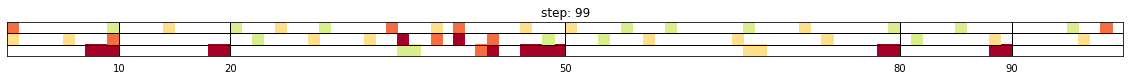

In [29]:
left, right = 0, 100

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[:,i,:].astype(float)
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(station)
    ax.set_yticks([0,1,2])
    ax.grid(color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 400,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_bus_cars.gif',
                 writer='ffmpeg',  
                  dpi=300)

## Research cars and bus

Road - 1000 cells (7500 m)

Bus station interval - 70 cells (about 500 m)

Bus capacity - 80 passengers


In [102]:
n_cells = 1000
n_lane = 3
station_step = 70
bus_capasity = 80
core = joblib.cpu_count() - 2

In [103]:
model.HumanDriveVehicle._vel_max, model.Bus._vel_max

(3, 3)

In [104]:
station = tuple([i for i in range(0, n_cells, station_step)])
len(station)

15

In [105]:
model.Bus.set_station(station)

__Optiaml amount of bus__

In [8]:
bus_amount = np.arange(0, n_cells//model.Bus._lenght)[1::20]
len(bus_amount)
bus_amount

array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221, 241,
       261, 281, 301, 321, 341, 361, 381, 401, 421, 441, 461, 481])

In [12]:
def step(buses):
    road_param = {
        "N_cells": n_cells,
        "N_lane": 1,
    }
    model.Bus.set_station(station)
    cars = {model.Bus: buses}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [15]:
%%time
tabel_bus = Parallel(n_jobs=core, verbose=10)(delayed(step)(buses) for buses in bus_amount)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Batch computation too fast (0.0620s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done   8 out of  24 | elapsed:    4.8s remaining:    9.8s
[Parallel(n_jobs=10)]: Done  11 out of  24 | elapsed:    4.8s remaining:    5.7s
[Parallel(n_jobs=10)]: Done  14 out of  24 | elapsed:    4.8s remaining:    3.4s
[Parallel(n_jobs=10)]: Done  17 out of  24 | elapsed:    4.8s remaining:    1.9s
[Parallel(n_jobs=10)]: Done  20 out of  24 | elapsed:    4.8s remaining:    0.9s


KeyboardInterrupt: 

In [116]:
tabel_bus = pd.DataFrame(tabel_bus)
tabel_bus.head(3)

NameError: name 'tabel_bus' is not defined

__Research system bus-vehicle__ 

Total number of people: 1000

Research influence of passenger/drivers proportion to flow

In [106]:
people = 1000
proportion = np.linspace(0,1, 51)

In [107]:
passenger = people*proportion
drivers = 1000 - passenger.astype(int)
buses = passenger//bus_capasity

In [113]:
buses

array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,
        3.,  3.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,
        6.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,
        9., 10., 10., 10., 10., 11., 11., 11., 11., 12., 12., 12.])

In [11]:
def step(bus, veh):
    road_param = {
        "N_cells": n_cells+1,
        "N_lane": 3,
    }
    model.Bus.set_station(station)
    cars = {model.Bus: int(bus), model.HumanDriveVehicle: int(veh)}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [13]:
%%time
tabel_city = Parallel(n_jobs=core, verbose=10)(delayed(step)(buses[i], drivers[i]) for i in range(len(proportion)))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  4.7min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  6.0min
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done  38 out of  51 | elapsed:  7.0min remaining:  2.4min
[Parallel(n_jobs=10)]: Done  44 out of  51 | elapsed:  7.2min remaining:  1.1min


Wall time: 7min 13s


[Parallel(n_jobs=10)]: Done  51 out of  51 | elapsed:  7.2min finished


In [14]:
tabel_city = pd.DataFrame(tabebl_city)

In [96]:
#tabel_city.to_csv('data/tabel_city.csv')
tabel_city = pd.read_csv('data/tabel_city.csv')

In [97]:
tabel_city.head(5)

,Unnamed: 0,rho,flow,change_frequency
0,0,"[0.32367632367632365, 0.34665334665334663, 0.3...","[0.280969030969031, 0.28393606393606396, 0.270...",16.036667
1,1,"[0.32167832167832167, 0.32367632367632365, 0.3...","[0.2811788211788212, 0.28389610389610387, 0.26...",15.816667
2,2,"[0.3156843156843157, 0.3246753246753247, 0.318...","[0.27994005994005994, 0.2896803196803197, 0.27...",13.553333
3,3,"[0.3016983016983017, 0.3166833166833167, 0.320...","[0.28606393606393604, 0.2855744255744256, 0.28...",14.083333
4,4,"[0.2947052947052947, 0.3066933066933067, 0.318...","[0.2836063936063936, 0.28804195804195803, 0.27...",13.593333


In [118]:
rho = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel_city['rho'].values])
flow = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel_city['flow'].values])
flow.mean(axis=1)

array([0.27845155, 0.27763903, 0.28242424, 0.28413919, 0.28324675,
       0.29034632, 0.28981352, 0.29901099, 0.29834499, 0.30115551,
       0.30038295, 0.3001998 , 0.30591409, 0.30025308, 0.31092574,
       0.30942724, 0.30567433, 0.30882784, 0.30891775, 0.32148185,
       0.31768898, 0.31261405, 0.30398934, 0.31982018, 0.31006993,
       0.30247086, 0.29660007, 0.30217449, 0.2942291 , 0.28818515,
       0.28288378, 0.27950383, 0.26518482, 0.2532634 , 0.2444622 ,
       0.2362038 , 0.22526141, 0.21230769, 0.19688645, 0.18274725,
       0.1667366 , 0.15181152, 0.13599068, 0.11875125, 0.10368298,
       0.08745921, 0.0710323 , 0.05448884, 0.03820846, 0.02197136,
       0.00512155])

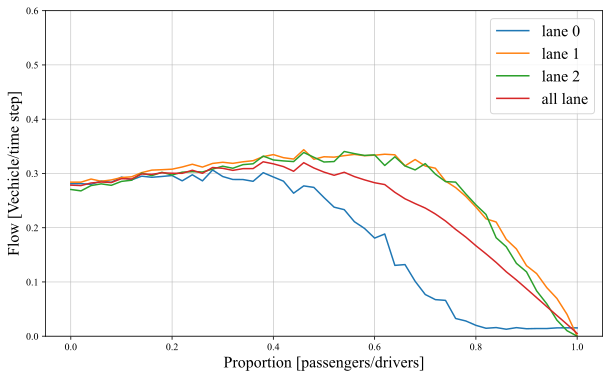

In [120]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for i in range(rho.shape[1]):
    label = f'lane {i}'
    plt.plot(proportion, flow[:,i], label=label)
    
label = "all lane"
plt.plot(proportion, flow.mean(axis=1), label=label)

plt.ylim(0,0.6)
#plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
#plt.title(r'Three lane model', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [121]:
fig.savefig("data/bus_veh.jpg")

__Research city model__

$N$ - total number of people

$N_{1}$ - passengers without vehicle

$M = (N - N_1)$ - passengers with vehicle